#1. Importing the data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
dataset=pd.read_csv("Fake_real_news.csv")

In [ ]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
dataset=dataset[0:200]
dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
195,195,"Watch: Police viciously attack, arrest peacefu...",NaN,"Wed, 26 Oct 2016 13:29 UTC © The Free Thought ...",1
196,196,NaN,Raffie,They got the heater turned up on high.,1
197,197,Comment on Parents on a Date Were Asleep in Ca...,FaceSpace,Home / Badge Abuse / Parents on a Date Were As...,1
198,198,Could Teaching Men to Nurture Counteract Our C...,NaN,By Ann Deslandes / thevocal.com.au \nThe femin...,1


#2.Data Preprocessing

In [ ]:
dataset.isnull().sum()

id         0
title      5
author    22
text       1
label      0
dtype: int64

In [ ]:
dataset.dropna(axis=0,inplace=True)

In [ ]:
dataset.reset_index(inplace=True)

In [ ]:
dataset.columns

Index(['index', 'id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
dataset=dataset.drop(['index', 'id', 'title', 'author'],axis=1)

In [ ]:
dataset.head(3)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1


#3.Text Preprocessing

In [ ]:
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()

In [ ]:
corpus = []
for i in range(0, len(dataset)):
  review = re.sub('[^a-zA-Z]',' ',dataset['text'][i])
  review = review.lower()
  list_ = review.split()
  review = [ps.stem(word) for word in list_ if word not in set(stopwords.words('english'))]
  corpus.append(' '.join(review))

In [ ]:
# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(corpus).toarray()
y = dataset['label']

#4.data vizualization and Balancing the data

<Axes: xlabel='label', ylabel='count'>

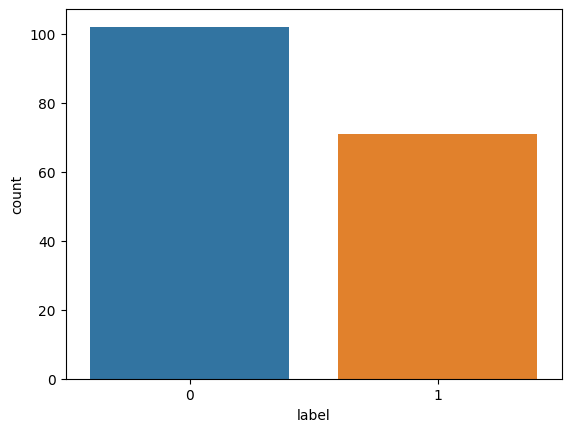

In [ ]:
sns.countplot(x=dataset['label'])

In [ ]:
y.value_counts()

0    102
1     71
Name: label, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
X_bal,y_bal=SMOTE().fit_resample(X,y)

In [ ]:
y_bal.value_counts()

1    102
0    102
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

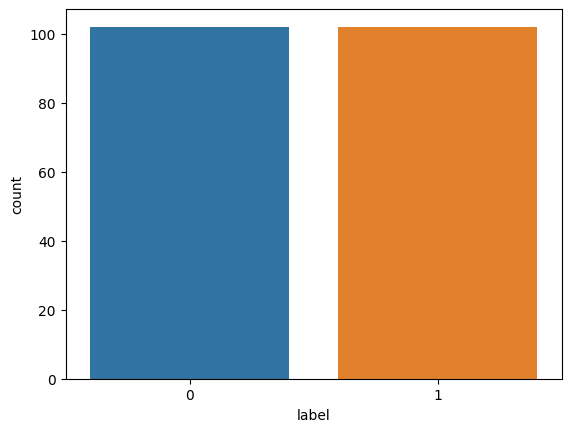

In [ ]:
sns.countplot(x=y_bal)

#5.Spliting data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.25, random_state=0)

#6.Model Training

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

#7.Model Evaluation

<Axes: >

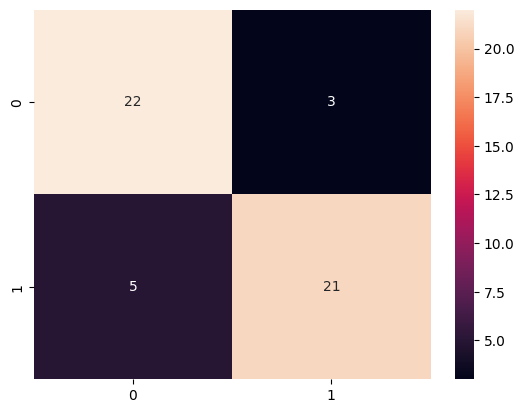

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8431372549019608
Precision: 0.875
Recall: 0.8076923076923077
F1-Score: 0.8400000000000001
